In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generating Data

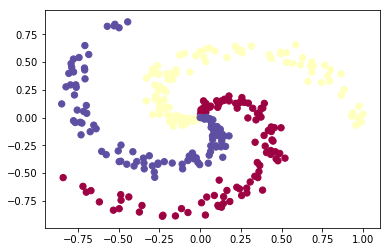

In [2]:
N = 100 #data points in each class
D = 2 #dimensions
K = 3 #classes, this makes total data points = 100*3 = 300
X = np.zeros((N*K, D)) # matrix of size 300, 2
y = np.zeros(N*K, dtype='uint8') # labels, vector of size 300, 1
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

Training a softmax linear classifier

In [3]:
#Init params
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

In [4]:
W

array([[-0.01027354,  0.0038408 , -0.00362492],
       [ 0.0068015 , -0.00080291, -0.0083928 ]])

In [5]:
b

array([[ 0.,  0.,  0.]])

In [6]:
scores = np.dot(X, W) + b # y = mx + b

In [7]:
scores.shape

(300, 3)

In [8]:
no_data_points = X.shape[0]
scores_exp = np.exp(scores)

#normalize
probs = scores_exp / np.sum(scores_exp, axis=1, keepdims=True)

In [14]:
correct_logprobs = -np.log(probs[range(no_data_points), y])

In [18]:
# compute the loss: average cross-entropy loss and regularization
reg = 1e-3
data_loss = np.sum(correct_logprobs)/no_data_points
reg_loss = 0.5 * reg * np.sum(W*W)
loss = data_loss + reg_loss